# NEURAL NETWORK FROM SCRATCH with Mathematical Details

There are many good sources that explains the neural network in general, such as youtube video, blogs, etc..  However, there is rarely a post that goes into detail in mathematics.  In this article, I tried to show the fundamental mathematics of neural networks as much as possible.  

The neural networks mimics functioning of human brain.  But in terms of mathematics, the neural network is nothing but matrix multiplications.  And we update matrices with gradient descent. 

## Forward Propagation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

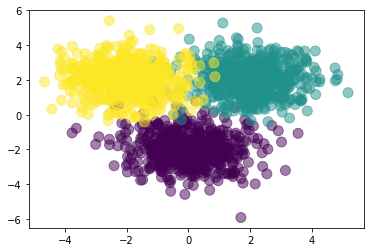

In [7]:
# create the data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

Let's look at the following example.  We have 3 types of points.  Yellow points are centered around at $(-2,2)$.  Green dots are centered around at $(2,2)$.  Purple dots are centered around at $(0,-2)$.  

A data point $X$ has two features: $x$-coordinate and $y$-coordiate.  But let's call them $x_1$, $x_2$, respectively, so $X = (x_1, x_2)$.  So $D$ the number of features is $2$.  There are 1500 data points total, so size of data $N = 1500$ .  

Let say we have one hidden layer with size $M = 3$, in other words, the number of nodes is 3.  And of course, the number of labels $K = 3$ since there are 3 categorical dots: yellow, green, purple.  

<img src="./nn_article.png" />

First of all, input is $X = [x_1, x_2]$.  Let's just consider 1 element of data since we want to focus on the mathematics.  $Z = [z_1, z_2, z_3]$, the hidden layer.  $A = [a_1, a_2, a_3]$, is output before we apply softmax function.  

$z_1 = \sigma(x_1w_{11} + x_2w_{21} + b_1)$

$z_2 = \sigma(x_1w_{12} + x_2w_{22} + b_2)$

$z_3 = \sigma(x_1w_{13} + x_2w_{23} + b_3)$

,where $\sigma(\cdot)$ is the sigmoid function 
$$
\sigma(x) = \frac{1}{1+e^{-x}},
$$

and $b = [b_1, b_2, b_3]$ is the bias term.  

We can write in this in matrix form, then it looks nicer.  $W$ is a 2 by 3 ($D \times M$) matrix.
$$
W = 
\left[
\begin{array}{ccc}
w_{11} && w_{12} && w_{13} \\
w_{21} && w_{22} && w_{23}
\end{array}
\right]
$$

Then 
$$ 
Z = [z_1, z_2, z_3] = \sigma\left(
[x_1, x_2] 
\left[
\begin{array}{cc}
w_{11} && w_{12} && w_{13} \\
w_{21} && w_{22} && w_{23}
\end{array}
\right]
+ [b_1, b_2, b_3] \right)
= \sigma(X\cdot W + b) 
$$



$a_1 = z_1v_{11} + z_2v_{21} + z_3v_{31} + c_1$

$a_2 = z_1v_{21} + z_2v_{22} + z_3v_{32} + c_1$

$a_3 = z_1v_{31} + z_2v_{32} + z_3v_{33} + c_1$

,where $c = [c_1, c_2, c_3]$ is the bias term.  

Output $Y$ is 
$$
Y = [y_1, y_2, y_3] = [softmax(a_1), softmax(a_2), softmax(a_3)] = softmax([a_1, a_2, a_3]) = softmax(A)
$$
, where softmax function is 
$$
softmax(a_k) = \frac{e^{a_k}}{e^{\Sigma_i^n a_i}}
$$

Then,  $V$ is 3 by 3 ($M \times K$) matrix. 
$$
V = 
\left[
\begin{array}{ccc}
v_{11} && v_{12} && v_{13} \\
v_{21} && v_{22} && v_{23} \\
v_{31} && v_{32} && v_{33}
\end{array}
\right]
$$

Again, let's write in matrix form.  
$$ 
Y = [y_1, y_2, y_3] = softmax\left(
[z_1, z_2, z_3] 
\left[
\begin{array}{ccc}
v_{11} && v_{12} && v_{13} \\
v_{21} && v_{22} && v_{23} \\
v_{31} && v_{32} && v_{33}
\end{array}
\right]
+ [c_1, c_2, c_3] \right)
= softmax(Z\cdot V + c) = softmax(A)
$$


Now, combining all together, we have
$$ 
Y = softmax(\sigma(X\cdot W +b ) \cdot V + c)
$$

This can be written in python code as following:

```python
def forward(X, W, b, V, c):
    Z = 1 / (1 + np.exp(-X.dot(W) - b))
    A = Z.dot(V) + c
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z    
```

## Backpropagation

So far, it was only forward propagation(ie. how to get an output $Y$ from input $X$).  With optimal $W, b, V, c$, we will get the optimal prediction $Y$.  The optimal preidiction $Y$ means that $Y$ values that gives that most accuracy.  

To compare the predicted value and actual target value, we need the Loss function $L$.  So the goal is we need to find $W, b, V, c$ such that minimize the Loss function $L$.   

Then what is Loss function?  The Loss function $L$ is 
$$ 
L = \Pi_{n=1}^N \Pi_{k=1}^K y_{n,k}^{t_{n,k}}
$$

What is this weird looking function?  

The loss function comes from likelihood function in statistics. What is likelihood function then?  

Here is an example.  Suppose you throw a die.  Possible outcome is 1 through 6.  In our case, we can say it has six labels.  $K = [1,2,3,4,5,6]$.  Suppose $Y$ is the probability for each outcome, therefore, $Y = [y_1, y_2, y_3, y_4, y_5, y_6]$.  You might say, 'isn't it obvious that each $y_i$'s is $1/6$?'.  In this simple example, yes.  However, most statistic problem deals with unknown probability(or distribution), and we want to know these values.  In real life, only thing we have is statistical data, and we want to know the distribution by observing data.  Of course, more data we have is better. The method we are using is maximum likelihood method.   

Suppose we have thrown a die 7 times and following outcome has shown: $S = [2,4,6,2,3,1,5]$.  In real life, we should have larger data set to estimate the correct probabilities, but we keep it simple here.  Then the probability that we have the sequence $S$ is $y_2y_4y_6y_2y_3y_1y_5$.  Therefore, likelihood function is 
$$
L(y_1, y_2, y_3, y_4, y_5, y_6) = y_2y_4y_6y_2y_3y_1y_5
$$

But we can rewrite 
$$
\begin{array}{ll}
L(y_1, y_2, y_3, y_4, y_5, y_6)&& = y_2y_4y_6y_2y_3y_1y_5  \\
&&= (y_1^0y_2^1y_3^0y_4^0y_5^0y_6^0)(y_1^0y_2^0y_3^0y_4^1y_5^0y_6^0)(y_1^0y_2^0y_3^0y_4^0y_5^0y_6^1)\cdots(y_1^0y_2^0y_3^0y_4^0y_5^0y_6^1) \\
&&= \Pi_{n=1}^7 \Pi_{k=1}^6 y_{n,k}^{t_{n,k}}
\end{array}
$$

,where $$
t_{n,k} =\left\{ \begin{array}{l} 1 \text{ if we roll  $k$ }  \\
                                    0 \text{ otherwise.} 
                                    \end{array}
                                    \right.
                                    $$

Note that $N = 7$ is the size of data set, and $K = 6$ is the number of labels.  $Y$ is the probability, and it makes sense.  At the example at the begining, $Y = softmax(A)$.  After applying softmax fuction to $A$, the $Y = [y_1, y_2, y_3]$ is really list of probablities which sums up to 1.  And we can refer $t_{n,k}$ as the hot encoding of $Y$.   

We want to maximize the function $L$.  We will take log so we can make the computation easier.  Then 
$$\log(L) = \log(\Pi_{n=1}^N \Pi_{k=1}^K y_{n,k}^{t_{n,k}}) = \Sigma_{n=1}^N \Sigma_{k=1}^K t_{n,k} \log y_{n,k}$$

We want to know which value gives the maximum, so it is ok to take the log since log is strictly increasing and differentiable. Most of text, we have the cost function $J = -\log(L)$ and we minimize the function $J$.  Note we have put (-) in front of $\log(L)$, so the value that gives maximum of $\log(L)$ is same as the value that gives minimum of $J = -\log(L)$.  

So, we have cost function $J = -\Sigma_{n=1}^N \Sigma_{k=1}^K t_{n,k} \log y_{n,k}$

<img src="./J.png" />

However, in many real application problem, many problems may have lots of variables and computation might be very tedious and time consuming.  And even if we take the derivative and set the equation equal to $0$, there are many equations that are impossible to find the exact algebraic solution.  We can only approximate.   
         
The Gradient Descent is an alternate techinque that we can get away with many computational difficulties.  We put the process in recurrence sequence, so that the computer can perform the process in very short time and efficiently.  
         
We apply following the sequence:          
$$w_{new} = w - \alpha * \frac{dJ}{dw}$$ 
,where $\alpha$ is a learning rate. 

The question is then, where does this formula come from? 

The function is increasing at $w_0$.  So the minimum happens on the left of $w_0$.  This means we want to go to left direction.  That is $w_1$ is $w_0$ minus some positive number.  

Want:  $w_1 = w_0 - $some positve number

Note that the derivative at $w_0$, $\frac{dJ}{dw}(w_0)$ is positive since the function at $w_0$ is increasing. Therefore, we have 
$$ w_1 = w_0 - \alpha * \frac{dJ}{dw}(w_0). $$  

,where $\alpha$ is a learning rate, a positve constant number so that we keep the subtracting positive number small enough to make the process efficient.  

# Decreaing Function

If the function is decreasing, the we have the following picture. 
<img src="./gddec.png" />

The function is decreasing at $w_0$, which means minimum happens at right side of $w_0$.  Therefore, we want to subtract some small negative number from $w_0$, so that we can go to right direction.  

want: $w_1 = w_0 - $ some negatve number

Note that the derivative at $w_0, \frac{dJ}{dw}(w_0)$, is negative, so we have the following: $$w_1 = w_0 - \alpha * \frac{dJ}{dw}(w_0)$$
,where $\alpha$ is the learning rate again.  

# Conclusion

Whether the function is increasing or decreasing the following formula: $$w_{new} = w - \alpha * \frac{dJ}{dw}(w)$$ 

We do this process many times, then we will have the $w$ which gives the minimum eventually.  I presented the two dimentional simple example above, but the gradient descent works in any dimensions.  

If we change the minus sign (-) to plus (+) then $$ w_{new} = w + \alpha * \frac{dJ}{dw}(w)$$, we are to find the $w$, which gives maximum.  And it is called gradient asecnt. 

# Back to Example

Let's continue with our example.  Let $w_0 = 1$, the initial value, and let $\alpha = 0.1$.  $\frac{dJ}{dw} = 2w$ by taking derivative.  Then

$w_1 = w_0 - \alpha * \frac{dJ}{dw}(w_0) =  1 - 0.1 * 2(1) = 0.8$ 

$w_2 = 0.8 - 0.1 * 2 * 0.8 =  0.64$

$w_3 = 0.64 - 0.1 * 2 * 0.64 = 0.512$ 

$\vdots$

$w_n \approx 0$ 

We keep this process, then we get $w = 0 $ at the end.  

This recurrent process can be written in code quite simply.  

```python
w = 1
for i in range(10):
    w = w - 0.1 * 2 * w
```
Note that $\alpha = 0.1$ and $\frac{dJ}{dw} = 2w$.

# Full Code of the Example

In [8]:
w = 1 
for i in range(20):
    print("J = %.3f at w%d = %.3f" % (w * w,i, w))
    w = w - 0.1 * 2 * w    

J = 1.000 at w0 = 1.000
J = 0.640 at w1 = 0.800
J = 0.410 at w2 = 0.640
J = 0.262 at w3 = 0.512
J = 0.168 at w4 = 0.410
J = 0.107 at w5 = 0.328
J = 0.069 at w6 = 0.262
J = 0.044 at w7 = 0.210
J = 0.028 at w8 = 0.168
J = 0.018 at w9 = 0.134
J = 0.012 at w10 = 0.107
J = 0.007 at w11 = 0.086
J = 0.005 at w12 = 0.069
J = 0.003 at w13 = 0.055
J = 0.002 at w14 = 0.044
J = 0.001 at w15 = 0.035
J = 0.001 at w16 = 0.028
J = 0.001 at w17 = 0.023
J = 0.000 at w18 = 0.018
J = 0.000 at w19 = 0.014
